In [2]:
import zipfile
import numpy as np
#import skimage.io
#import skimage.viewer
#import skimage.filters
#import skimage.measure
#import skimage.morphology
import matplotlib.pyplot as plt
import matplotlib
import cv2
from PIL import Image
import io
from plantcv import plantcv as pcv
import os
import glob

In [5]:
img = cv2.imread('hoi.png', cv2.IMREAD_GRAYSCALE)

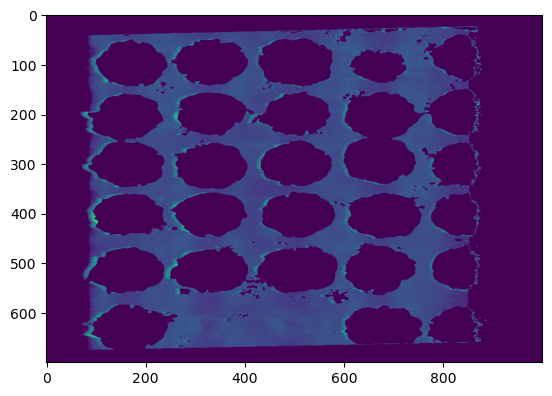

In [6]:
plt.imshow(img)

### Test on one picture

In [3]:
archive = zipfile.ZipFile('Heightmap/20210601_FX10_heightmap.zip', 'r')

In [4]:
archive_NDVI = zipfile.ZipFile('NDVI/20210601_FX10_NDVI.zip', 'r')

In [5]:
#print(archive_NDVI.namelist())

##### Read an image without unzipping it, saves a lot of space hehe

In [7]:
imgdata = archive.read('Params_SpecimFX10_IL407_20210601-001_heightmap.png')

In [8]:
imgdata_NDVI = archive_NDVI.read('Params_SpecimFX10_IL401_20210601-001_ndvi.png')

In [9]:
bytes_io = io.BytesIO(imgdata)

In [10]:
bytes_io_NDVI = io.BytesIO(imgdata_NDVI)

##### Make sure the image is read in a way that is compatible with skimage and plantcv

In [11]:
im = Image.open(bytes_io).convert('L') 

In [12]:
im_NDVI = Image.open(bytes_io_NDVI).convert('L') 

In [13]:
im_rgb_NDVI = Image.open(bytes_io_NDVI).convert('RGB') 

In [14]:
np_im_g = np.array(im) 

In [15]:
np_im_g_NDVI = np.array(im_NDVI) 

In [16]:
np_im_rgb_NDVI = np.array(im_rgb_NDVI) 

##### Heightmap plotting

In [20]:
pcv.params.debug = "plot"

In [21]:
pcv.plot_image(np_im_g)

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.misc

# downscaling has a "smoothing" effect
lena = np_im_g

# create the x and y coordinate arrays (here we just use pixel indices)
xx, yy = np.mgrid[0:lena.shape[0], 0:lena.shape[1]]


/tmp/ipykernel_339556/836451542.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


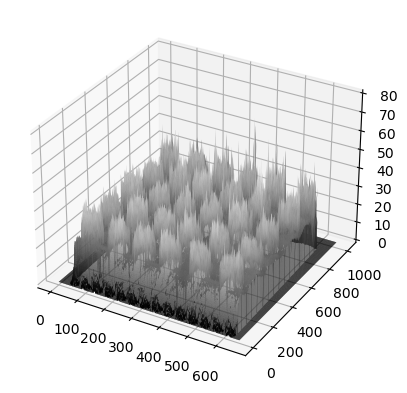

In [81]:
# create the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, lena ,rstride=1, cstride=1, cmap=plt.cm.gray,
        linewidth=0)
ax.set_zlim(0, 80)

# show it
plt.show()

#### Apply thresholding

In [ ]:
a_thresh = pcv.threshold.otsu(gray_img=np_im_g_NDVI, max_value=255, object_type='dark')

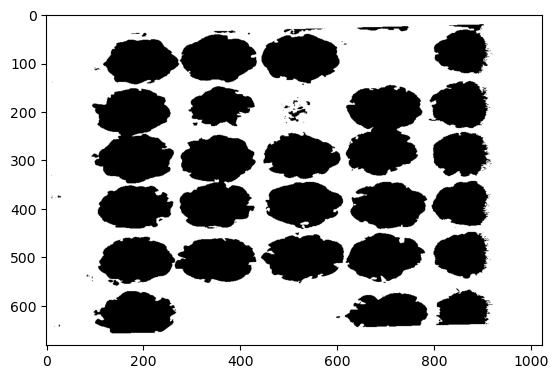

In [22]:
a_fill = pcv.fill(bin_img=a_thresh, size=200)

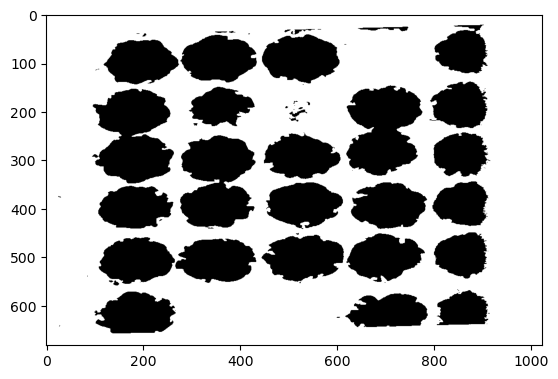

In [23]:
dilated = pcv.dilate(gray_img=a_fill, ksize=2, i=1)

In [24]:
Mask = cv2.bitwise_not(dilated)

##### FInd the different objects in the image so that the surface can be calculated

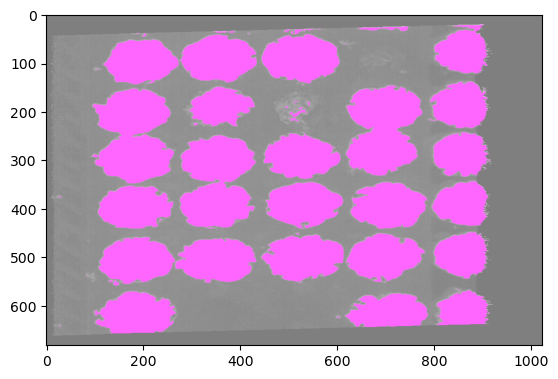

In [25]:
obj, obj_hierarchy = pcv.find_objects(img=np_im_rgb_NDVI, mask=Mask)

In [26]:
new_list=[x for x in obj if len(x)>=100 and len(x) <= 1000]

In [262]:
new_obj = np.array(new_list)

/tmp/ipykernel_4193956/3960976757.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


There were 45 objects not annotated.


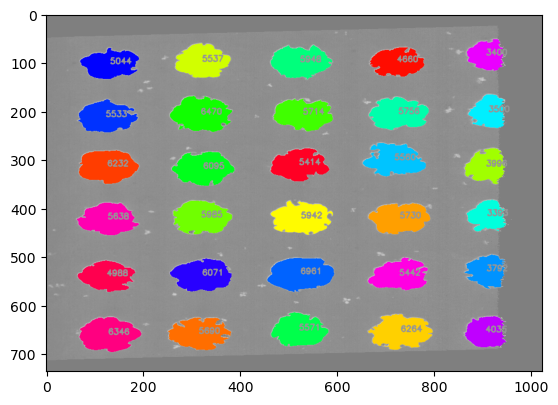

In [263]:
plotting_img = pcv.visualize.obj_sizes(img=np_im_rgb_NDVI, mask=Mask, num_objects=30)

##### Get the size of the objects

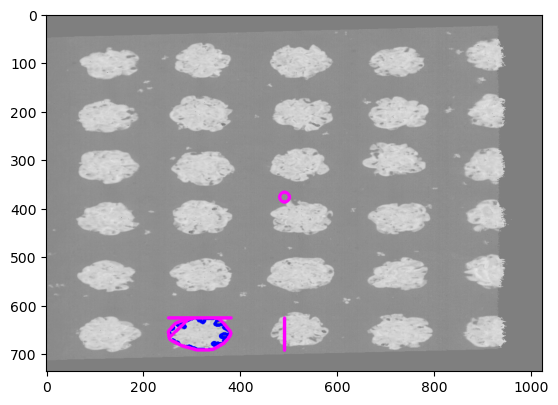

In [264]:
analysis_image = pcv.analyze_object(img=np_im_rgb_NDVI, obj=new_obj[0], mask=Mask, label="default")

In [200]:
plant_area = pcv.outputs.observations

In [202]:
plant_area['default']['ellipse_center']['value']

(888.0758666992188, 577.8430786132812)

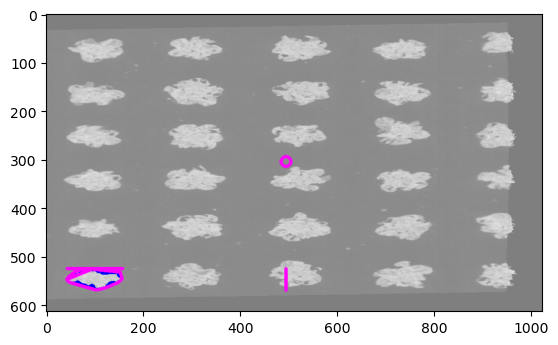

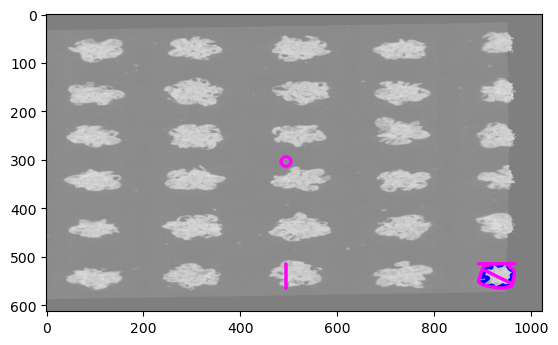

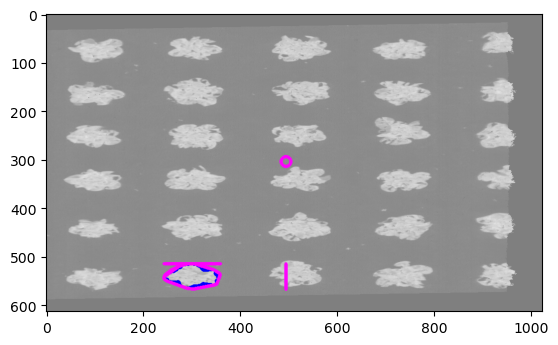

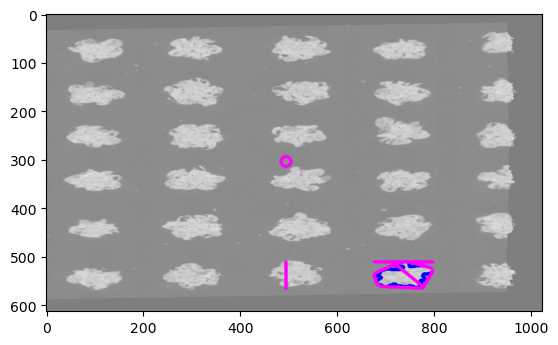

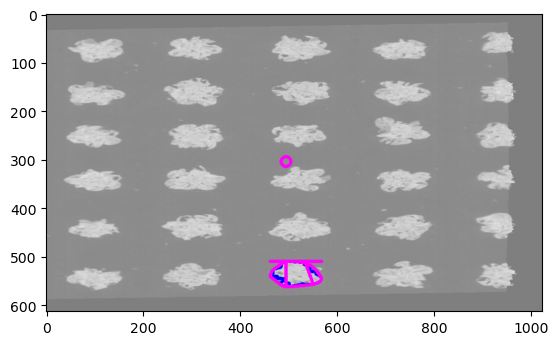

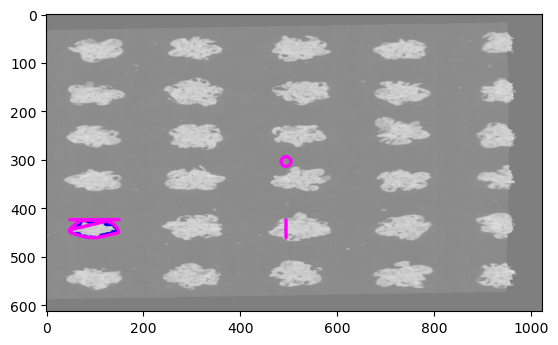

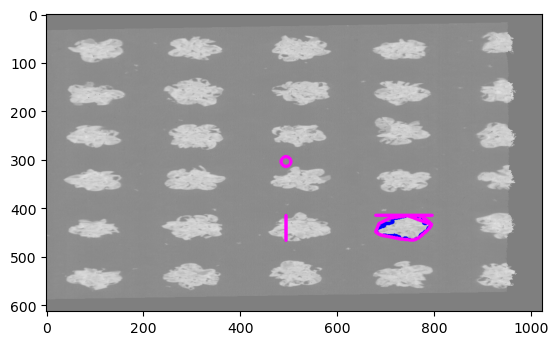

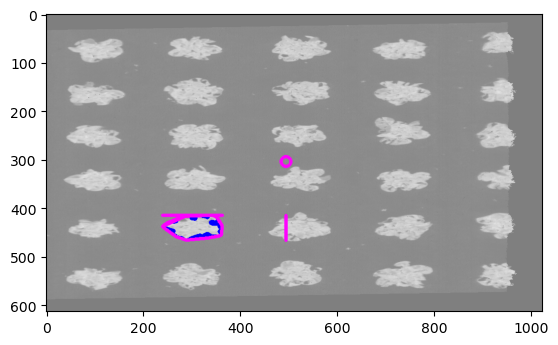

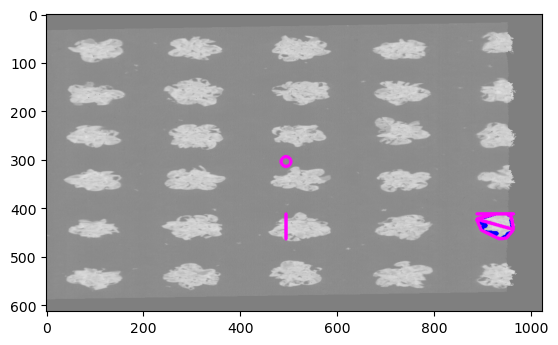

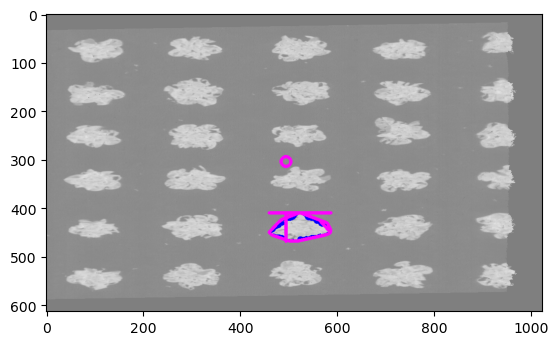

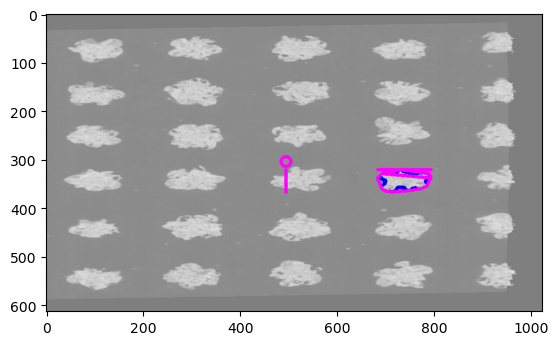

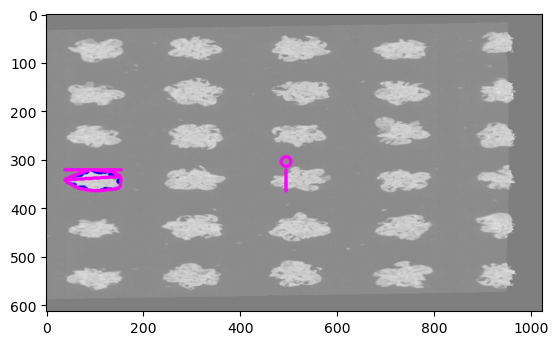

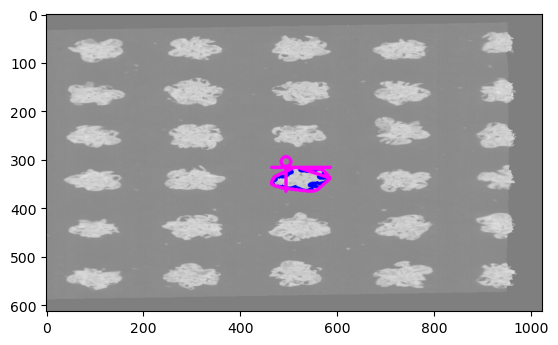

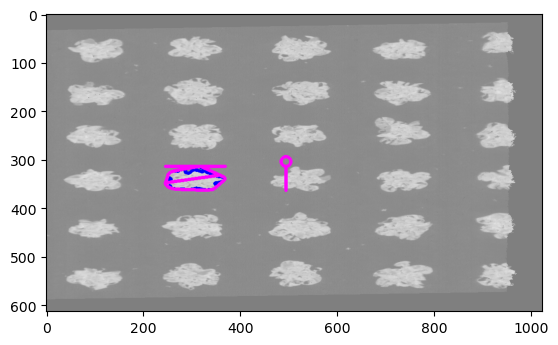

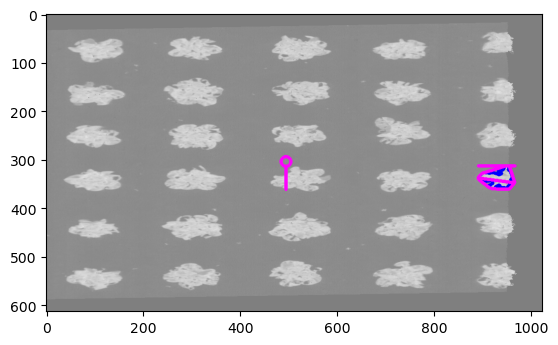

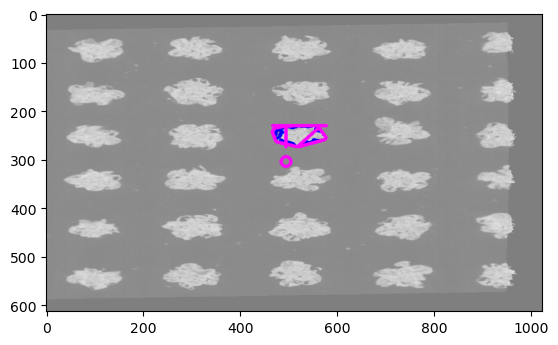

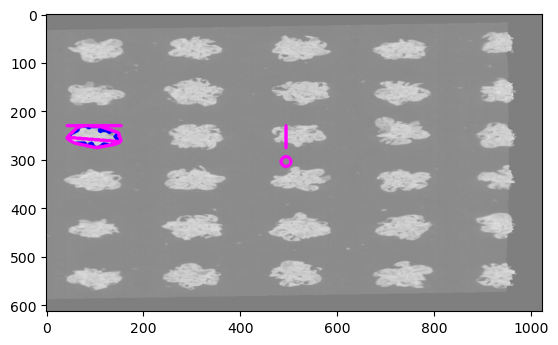

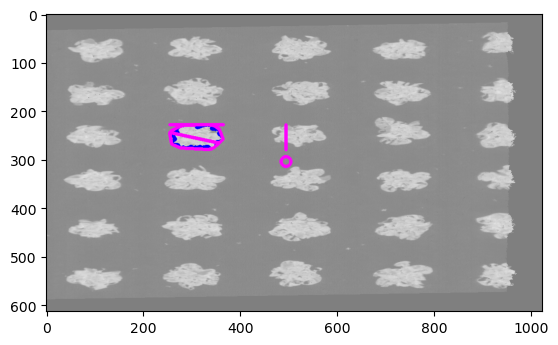

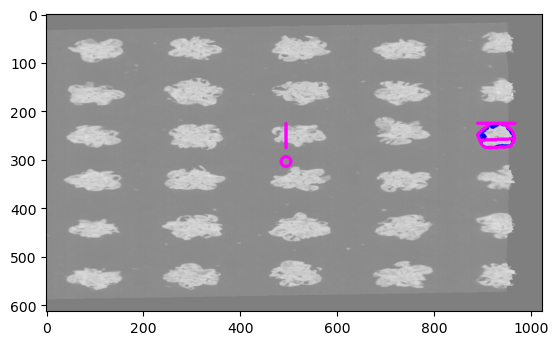

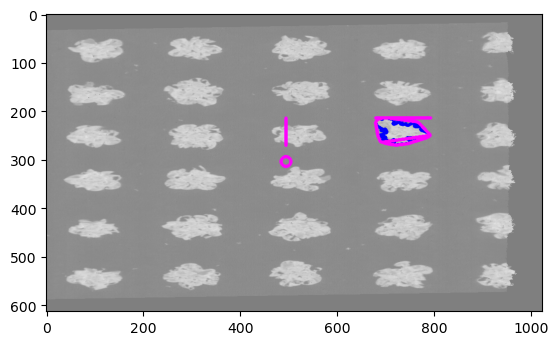

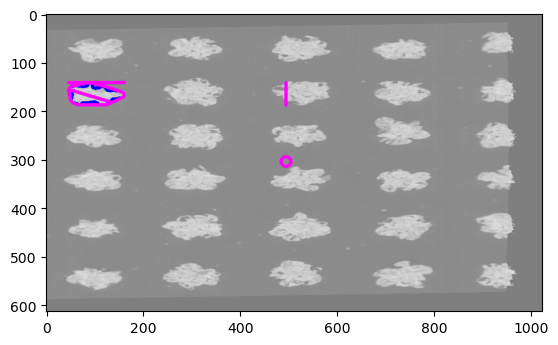

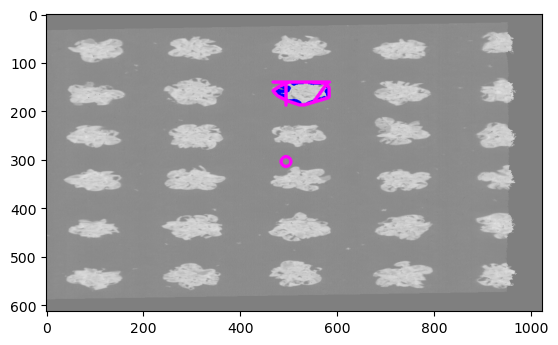

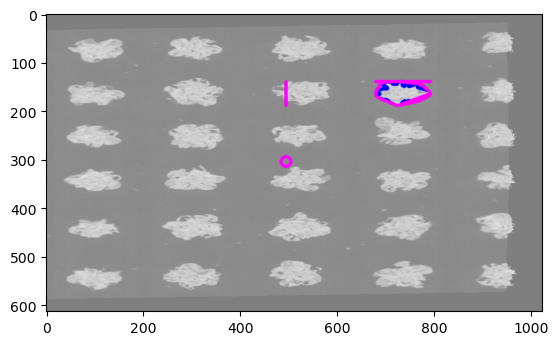

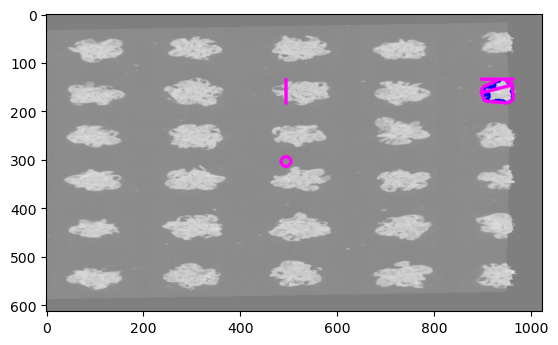

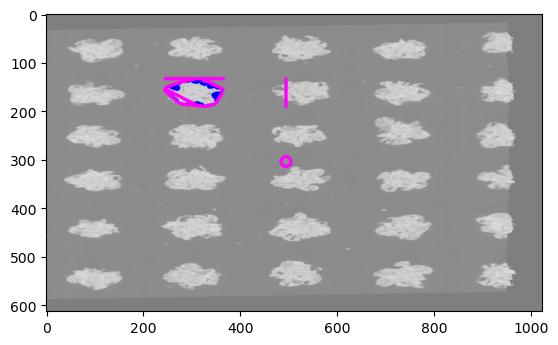

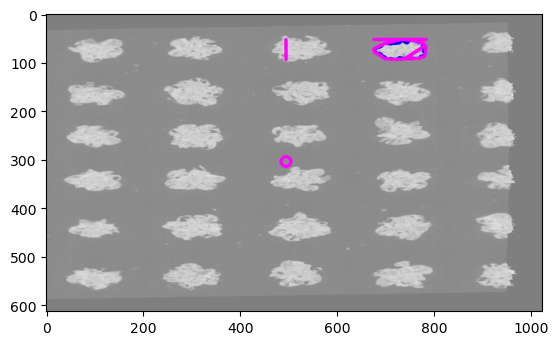

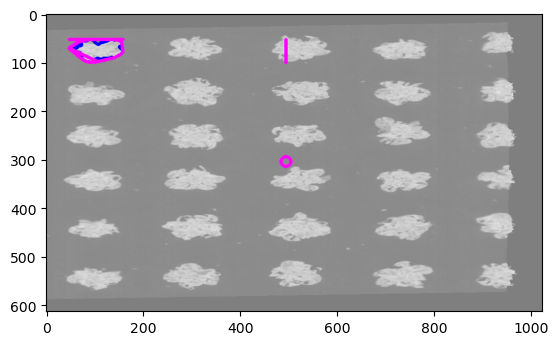

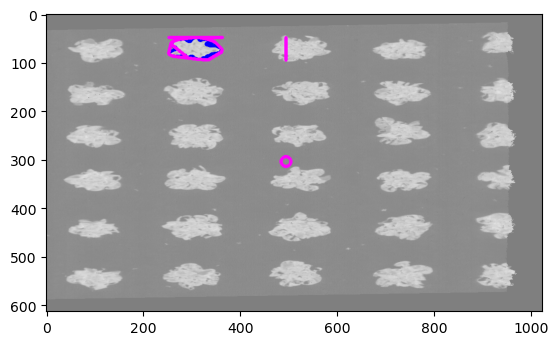

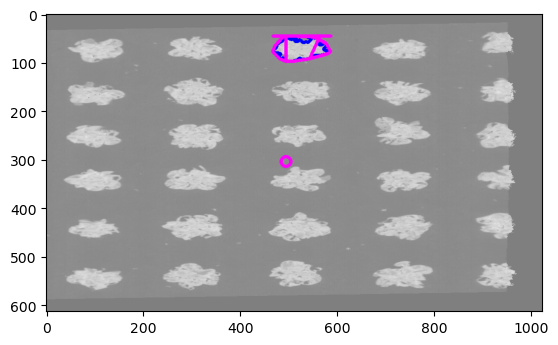

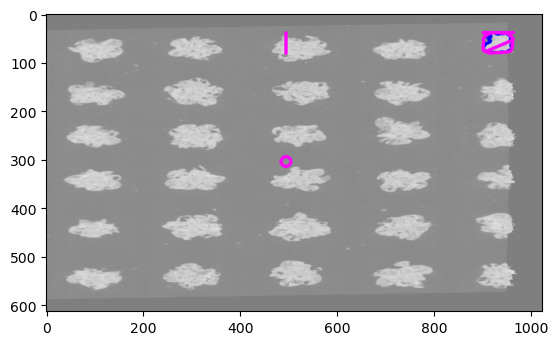

In [23]:
cha_list = []
ec_list = []
for obj in new_obj:
    analysis_image = pcv.analyze_object(img=np_im_rgb, obj=obj, mask=Mask, label="default")
    plant_area = pcv.outputs.observations
    cha = plant_area['default']['convex_hull_area']['value']
    ec = plant_area['default']['ellipse_center']['value']
    cha_list.append(cha)
    ec_list.append(ec)
    

##### Use auto_crop to get an image of just one crop

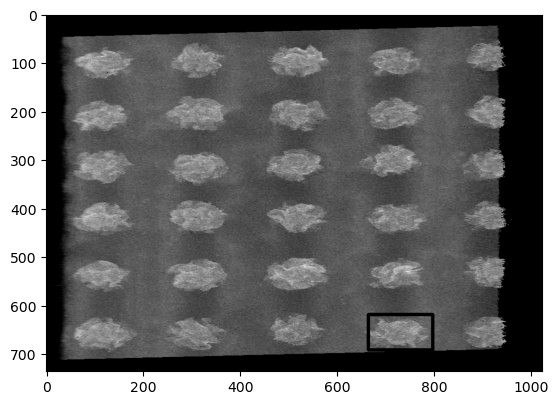

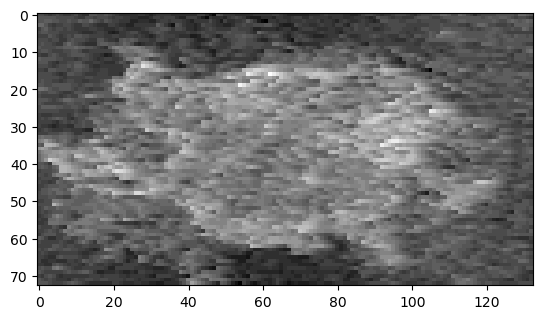

In [265]:
crop_img2 = pcv.auto_crop(img=np_im_g, obj=new_obj[3], padding_x=0, padding_y=0, color='image')

In [266]:
np.mean(crop_img2)

16.974353692450304

In [151]:
Mask_c = cv2.bitwise_not(cropped)

##### Now let's try to compute the growth rate over time 

In [46]:
archive_0528 = zipfile.ZipFile('NDVI/20210528_FX10_NDVI.zip', 'r')

In [47]:
imgdata_0528 = archive_0528.read('Params_SpecimFX10_IL425_20210528-001_ndvi.png')

In [48]:
bytes_io_0528 = io.BytesIO(imgdata_0528)

In [49]:
im_0528 = Image.open(bytes_io_0528).convert('L') 

In [50]:
im_rgb_0528 = Image.open(bytes_io_0528).convert('RGB') 

In [51]:
np_im_g_0528 = np.array(im_0528)

In [52]:
np_im_rgb_0528 = np.array(im_rgb_0528)

In [53]:
h, w = np_im_g.shape

In [54]:
dim = (w, h)

In [55]:
resized_g = cv2.resize(np_im_g_0528, dim, interpolation = cv2.INTER_AREA)

In [56]:
resized_rgb = cv2.resize(np_im_rgb_0528, dim, interpolation = cv2.INTER_AREA)

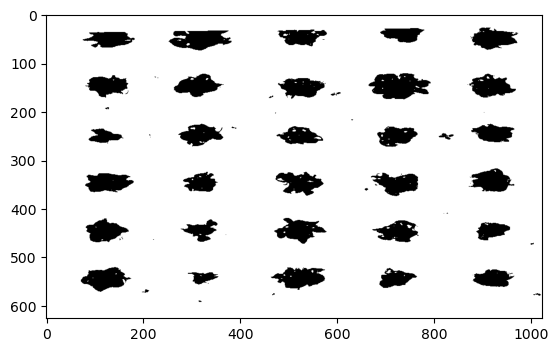

In [57]:
a_thresh_0528 = pcv.threshold.otsu(gray_img=resized_g, max_value=255, object_type='dark')

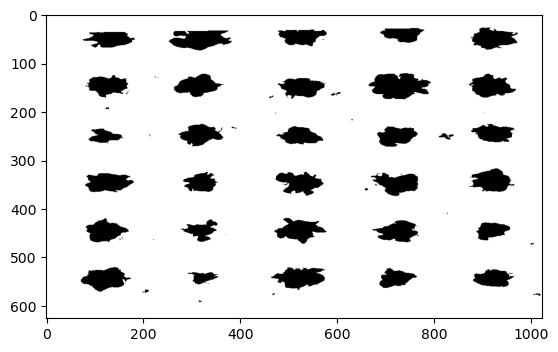

In [58]:
a_fill_0528 = pcv.fill(bin_img=a_thresh_0528, size=200)

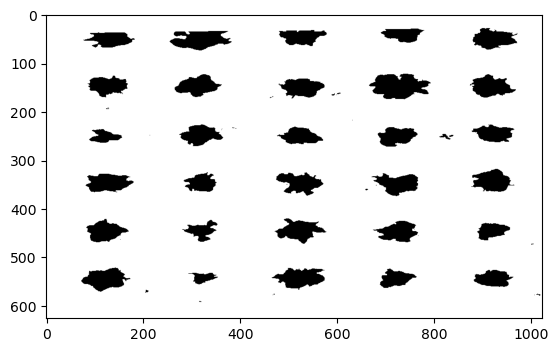

In [59]:
dilated_0528 = pcv.dilate(gray_img=a_fill_0528, ksize=2, i=1)

In [60]:
Mask_0528 = cv2.bitwise_not(dilated_0528)

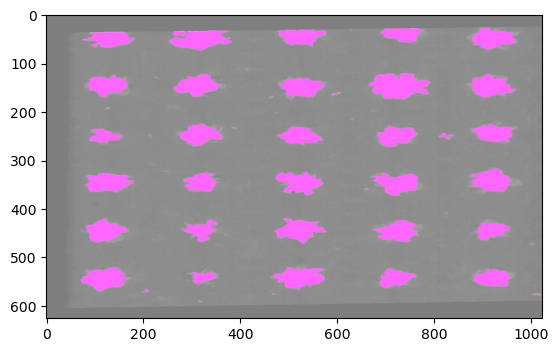

In [61]:
obj_0528, obj_hierarchy_0528 = pcv.find_objects(img=resized_rgb, mask=Mask_0528)

In [67]:
new_list_0528=[x for x in obj_0528 if len(x)>=50]

In [68]:
new_obj_0528 = np.array(new_list_0528)

/tmp/ipykernel_3286622/625434766.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


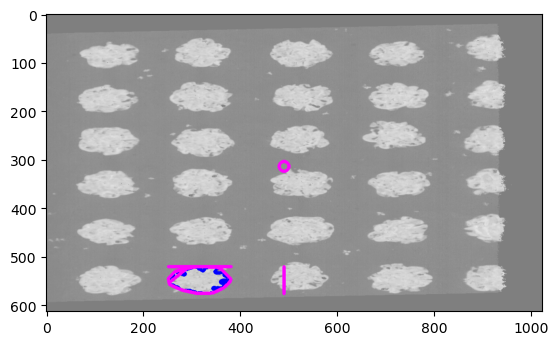

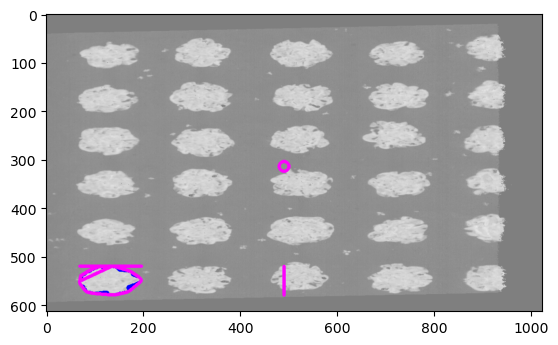

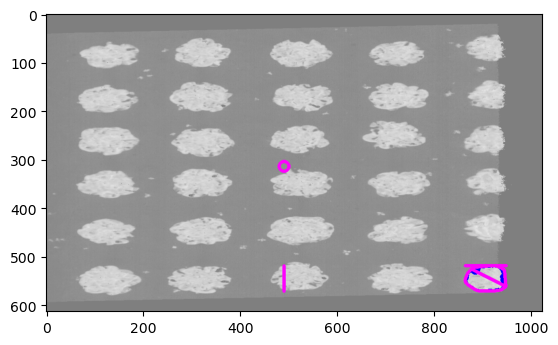

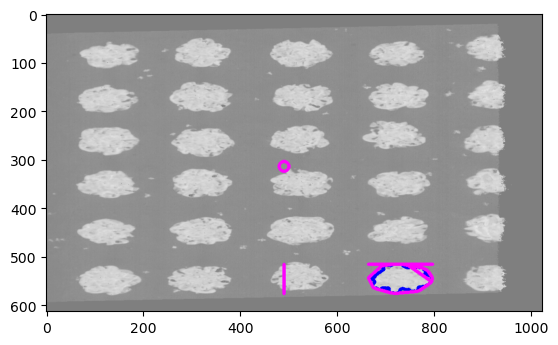

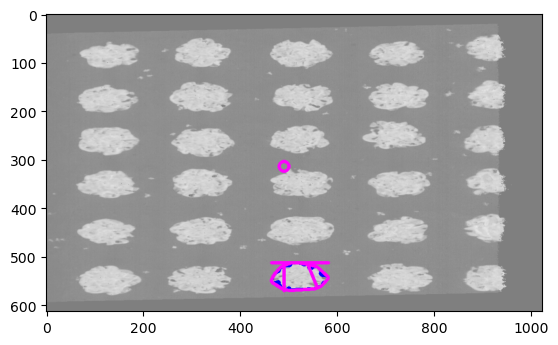

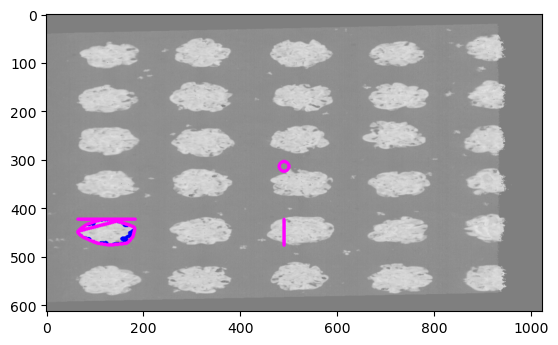

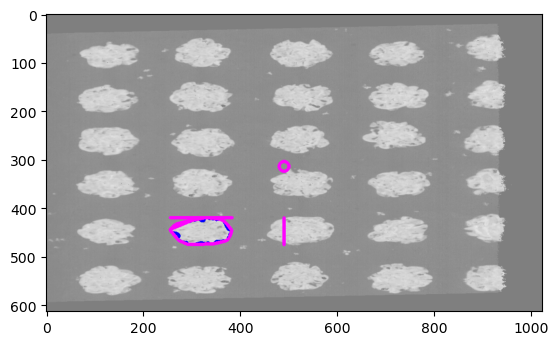

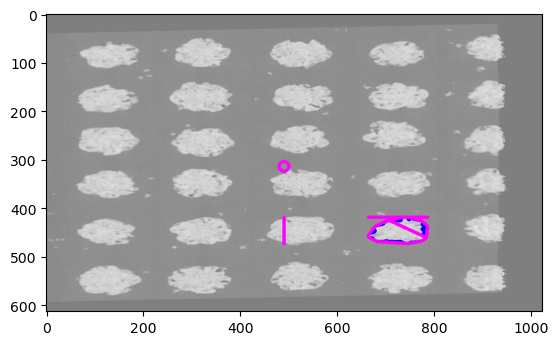

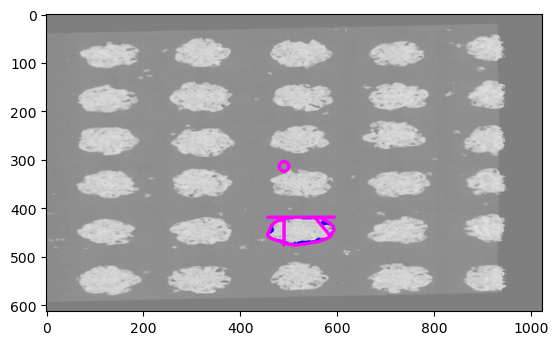

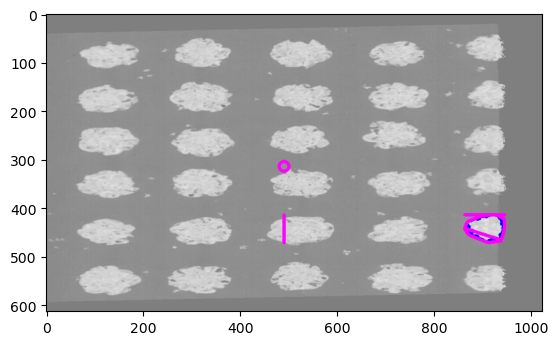

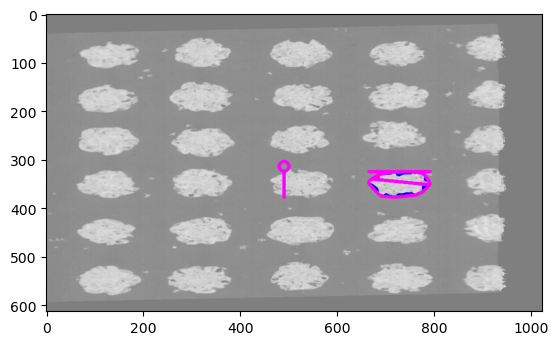

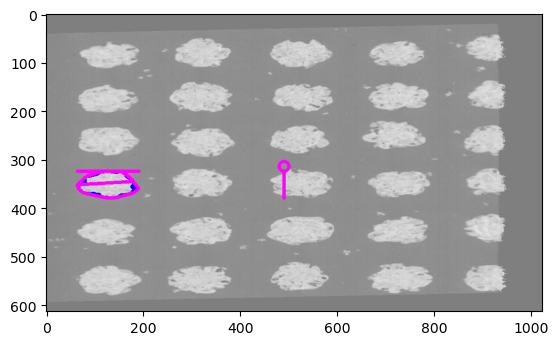

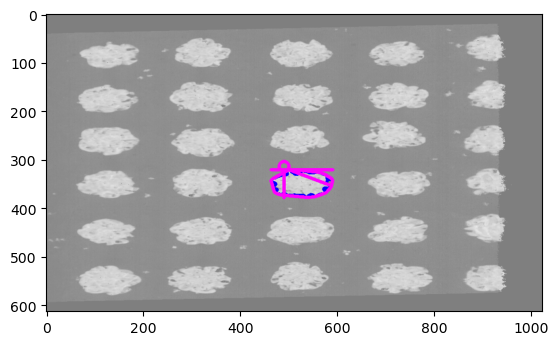

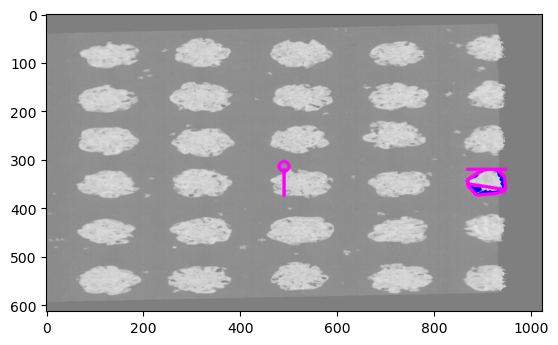

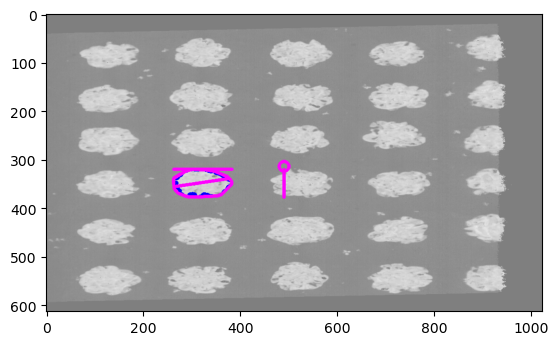

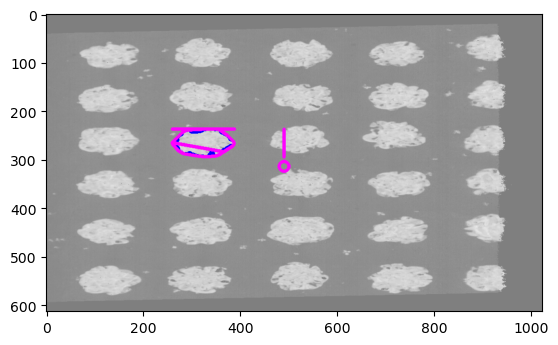

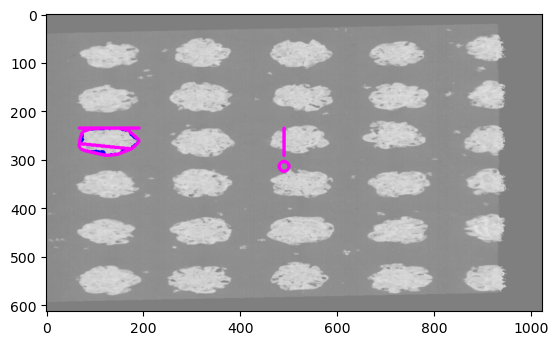

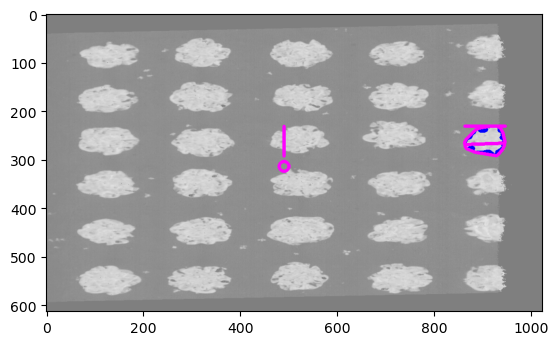

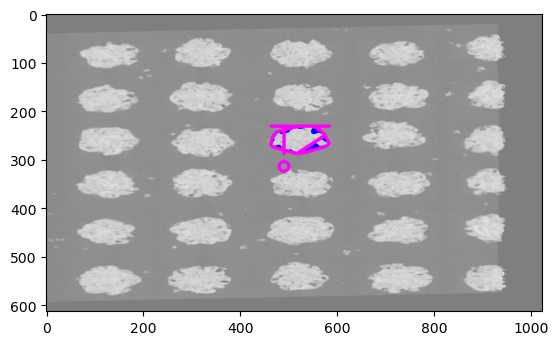

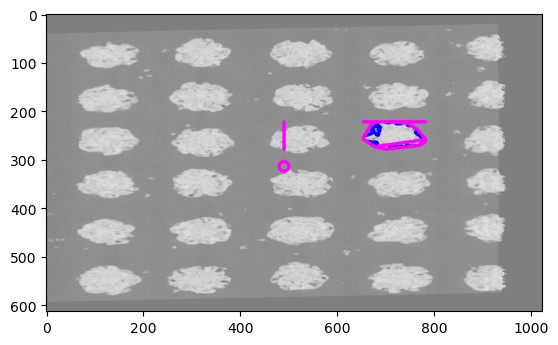

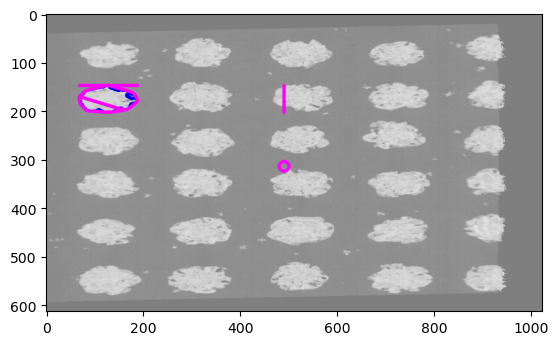

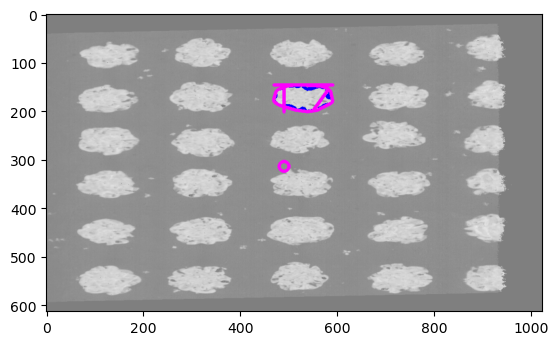

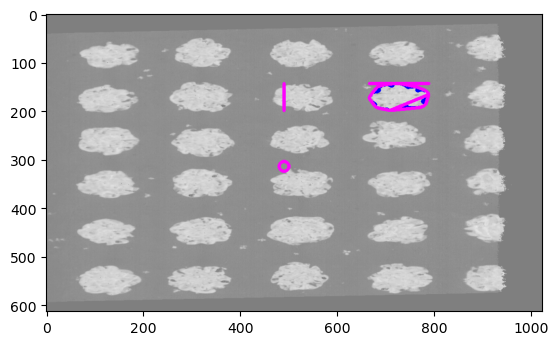

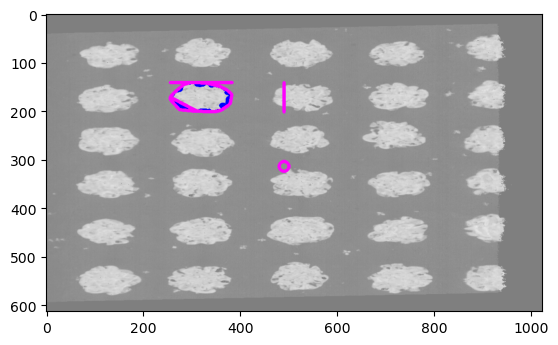

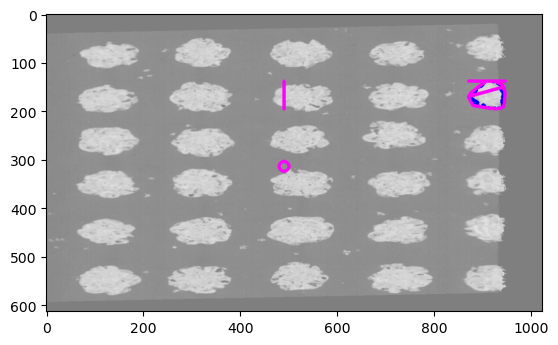

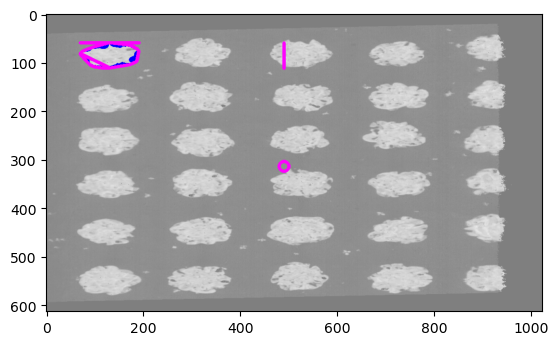

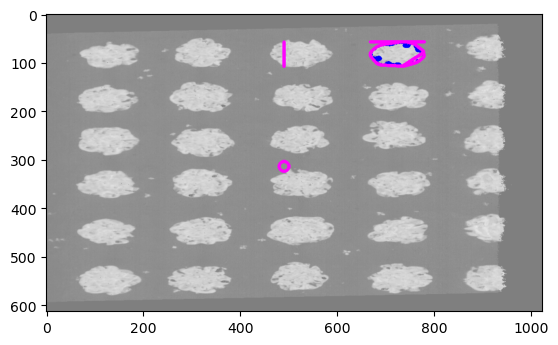

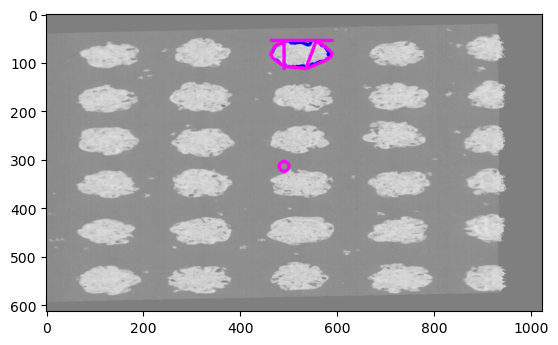

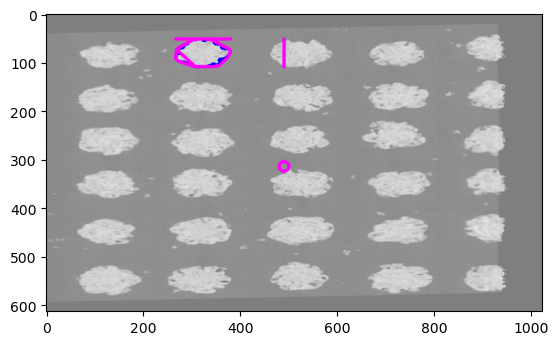

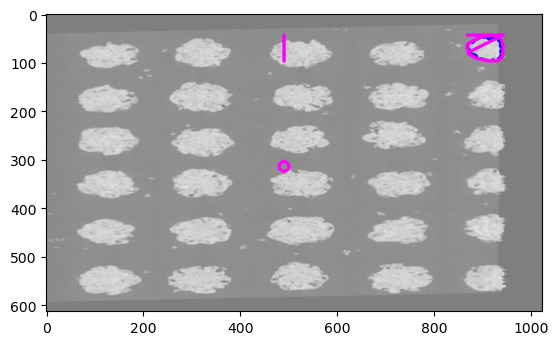

In [69]:
cha_list_0528 = []
ec_list_0528 = []
for obj in new_obj_0528:
    analysis_image_0528 = pcv.analyze_object(img=resized_rgb, obj=obj, mask=Mask_0528, label="default")
    plant_area_0528 = pcv.outputs.observations
    cha_0528 = plant_area_0528['default']['convex_hull_area']['value']
    ec_0528 = plant_area_0528['default']['ellipse_center']['value']
    ec_list_0528.append(ec_0528)
    cha_list_0528.append(cha_0528)

In [75]:
import math
growth_rates = []
for x, y in zip(ec_list, cha_list):
    dist_list = []
    close_0521 = []
    close_0528 = []
    size_0521 = []
    size_0528 = []
    for x_0528, y_0528 in zip(ec_list_0528, cha_list_0528):
        distance = math.dist(x, x_0528)
        dist_list.append(distance)
        close_0521.append(x)
        close_0528.append(x_0528)
        size_0521.append(y)
        size_0528.append(y_0528)
    min_value = min(dist_list)
    min_index = dist_list.index(min_value)
    growth_rates.append((size_0528[min_index] - size_0521[min_index]) / size_0521[min_index])
    